In [1]:
# import package/modul yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Mengatur agar display rows dan display columns yang dapat dilihat menjadi 200
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [4]:
df_chunk = pd.read_csv('loan.csv', chunksize=1000000)

Ketika membaca file loan.csv, chunksize digunakan agar lebih mudah untuk dibaca. File berukuran cukup besar, terdapat 2,2 juta baris data di dalam file. Chunksize diatur 1 juta, sehingga akan terdapat 3 file chunk

In [5]:
df_ls = []
for chunk in df_chunk:
    df_ls.append(chunk)

In [6]:
len(df_ls)

3

In [7]:
print('chunk 1 ada {} data'.format(len(df_ls[0])))
print('chunk 2 ada {} data'.format(len(df_ls[1])))
print('chunk 3 ada {} data'.format(len(df_ls[2])))

chunk 1 ada 1000000 data
chunk 2 ada 1000000 data
chunk 3 ada 260668 data


### Feature Selection

In [8]:
# membuat info dari setiap chunk, info berisi:
# nama kolom
# tipe data
# jumlah missing value
# persentase missing value
# jumlah nilai unik dari kolom

info = []
for df in df_ls:
    data = []
    for element in df.columns:
        temp = []
        temp.append(element)
        temp.append(str(df[element].dtype))
        temp.append(df[element].isnull().sum())
        temp.append(round(df[element].isnull().sum() / len(df) * 100, 2))
        temp.append(df[element].nunique())
        temp.append(list(df[element].value_counts().index[:2]))
        data.append(temp)
    info_df = pd.DataFrame(data, columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])
    info.append(info_df)

In [9]:
# Kolom dari masing-masing chunk yang yang missing value lebih dari 50%
col_null_50_all = []
for item in info:
    col_null_50= []
    for feature, pct in zip(list(item['dataFeatures']), list(item['nullPct'])):
        if pct > 50:
            col_null_50.append(feature)
    col_null_50_all.append(col_null_50)

In [10]:
# Kolom yang missing value lebih dari 50% terdapat di berapa chunk
#angka 3 artinya diseluruh chunk, kolom tersebut memiliki >50% tersebut kosong

dict_feature = {}
for element in col_null_50_all:
    for feature in element:
        if feature not in dict_feature.keys():
            dict_feature[feature] = 1
        else:
            dict_feature[feature] += 1

In [11]:
dict_feature

{'id': 3,
 'member_id': 3,
 'url': 3,
 'desc': 3,
 'mths_since_last_delinq': 3,
 'mths_since_last_record': 3,
 'mths_since_last_major_derog': 3,
 'annual_inc_joint': 3,
 'dti_joint': 3,
 'verification_status_joint': 3,
 'mths_since_recent_bc_dlq': 3,
 'mths_since_recent_revol_delinq': 3,
 'revol_bal_joint': 3,
 'sec_app_earliest_cr_line': 3,
 'sec_app_inq_last_6mths': 3,
 'sec_app_mort_acc': 3,
 'sec_app_open_acc': 3,
 'sec_app_revol_util': 3,
 'sec_app_open_act_il': 3,
 'sec_app_num_rev_accts': 3,
 'sec_app_chargeoff_within_12_mths': 3,
 'sec_app_collections_12_mths_ex_med': 3,
 'sec_app_mths_since_last_major_derog': 3,
 'hardship_type': 3,
 'hardship_reason': 3,
 'hardship_status': 3,
 'deferral_term': 3,
 'hardship_amount': 3,
 'hardship_start_date': 3,
 'hardship_end_date': 3,
 'payment_plan_start_date': 3,
 'hardship_length': 3,
 'hardship_dpd': 3,
 'hardship_loan_status': 3,
 'orig_projected_additional_accrued_interest': 3,
 'hardship_payoff_balance_amount': 3,
 'hardship_last_pa

In [12]:
# Mendrop seluruh kolom yang missing value > 50% terdapat di 2 chunk
columns_to_drop = list(dict_feature.keys())

In [13]:
for df in df_ls:
    df.drop(columns_to_drop, axis=1, inplace=True)

In [14]:
df_ls[0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.00,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,109xx,NY,18.24,0,Apr-2001,1.0,9,1,4341,10.3,34,w,2386.02,2386.02,167.020000,167.02,113.98,53.04,0.00,0.00,0.0000,Feb-2019,84.92,Feb-2019,0,1,Individual,0,0,16901,42000,9,1878.0,34360.0,5.9,0,0,140.0,212,1,1,0,1.0,2.0,0,2,5,3,3,16,7,18,5,9,0.0,0,0,3,100.0,0.0,1,0,60124,16901,36500,18124,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.00,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,713xx,LA,26.52,0,Jun-1987,0.0,13,1,12315,24.2,44,w,29387.75,29387.75,1507.110000,1507.11,612.25,894.86,0.00,0.00,0.0000,Feb-2019,777.23,Feb-2019,0,1,Individual,0,1208,321915,50800,10,24763.0,13761.0,8.3,0,0,163.0,378,4,3,3,4.0,4.0,0,2,4,4,9,27,8,14,4,13,0.0,0,0,6,95.0,0.0,1,0,372872,99468,15000,94072,N,Cash,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.00,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0.0,8,0,4599,19.1,13,w,4787.21,4787.21,353.890000,353.89,212.79,141.10,0.00,0.00,0.0000,Feb-2019,180.69,Feb-2019,0,1,Individual,0,0,110299,24100,4,18383.0,13800.0,0.0,0,0,87.0,92,15,14,2,77.0,14.0,0,0,3,3,3,4,6,7,3,8,0.0,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,N,Cash,N
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.00,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,985xx,WA,16.74,0,Feb-2006,0.0,10,0,5468,78.1,13,w,3831.93,3831.93,286.710000,286.71,168.07,118.64,0.00,0.00,0.0000,Feb-2019,146.51,Feb-2019,0,1,Individual,0,686,305049,7000,5,30505.0,1239.0,75.2,0,0,62.0,154,64,5,3,64.0,5.0,0,1,2,1,2,7,2,3,2,10,0.0,0,0,3,100.0,100.0,0,0,385183,36151,5000,44984,N,Cash,N
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.00,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,212xx,MD,26.35,0,Dec-2000,0.0,12,0,829,3.6,26,w,29339.02,29339.02,1423.210000,1423.21,660.98,762.23,0.00,0.00,0.0000,Feb-2019,731.78,Feb-2019,0,1,Individual,0,0,116007,23100,9,9667.0,8471.0,8.9,0,0,53.0,216,2,2,2,2.0,13.0,0,2,2,3,8,9,6,15,2,12,0.0,0,0,5,92.3,0.0,0,0,157548,29674,9300,32332,N,Cash,N
5,5550,5550,5550.0,36 months,15.02,192.45,C,C3,Director COE,10+ years,MORTGAGE,152500.00,Not Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,461xx,IN,37.94,0,Sep-2002,3.0,18,0,53854,48.1,44,w,5302.50,5302.50,377.950000,377.95,247.50,130.45,0.00,0.00,0.0000,Feb-2019,192.45,Feb-2019,0,1,Individual,0,0,685749,111900,8,40338.0,23746.0,64.0,0,0,195.0,176,10,4,6,20.0,3.0,0,4,6,6,10,23,9,15,7,18,0.0,0,0,4,100.0,60.0,0,0,831687,185378,65

Dengan melakukan penghapusan terhadap kolom yang memiliki missing value yang banyak. Kita dapat lebih mudah untuk melihat kolom apa saja yang akan digunakan untuk proses analisis lebih lanjut

In [15]:
# mendefinisikan kolom apa saja yang akan digunakan dalam analisis lebih lanjut
col_to_use = ['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'grade',
             'emp_length', 'emp_title', 'home_ownership', 'annual_inc',
              'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
             ]

In [16]:
# hanya menggunakan kolom yang telah digunakan untuk masing-masing chunk
ls_df_use = []
for df in df_ls:
    df_use = df[col_to_use]
    ls_df_use.append(df_use)

Penggunaan beberapa kolom saja untuk analisis menyebabkan memori yang digunakan tidak terlalu besar, sehingga kita dapat menggabungkan seluruh chunk tersebut ke satu data frame.

In [17]:
# menggabungkan seluruh chunk ke dalam satu dataframe bernama loan
loan = pd.concat(ls_df_use)

In [18]:
# Melihat info dari data loan
data = []
for element in loan.columns:
    temp = []
    temp.append(element)
    temp.append(str(df[element].dtype))
    temp.append(df[element].isnull().sum())
    temp.append(round(df[element].isnull().sum() / len(df) * 100, 2))
    temp.append(df[element].nunique())
    temp.append(list(df[element].value_counts().index[:2]))
    data.append(temp)
info_loan = pd.DataFrame(data, columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])
info_loan

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,loan_amnt,int64,0,0.00,1532,"[10000, 15000]"
1,funded_amnt,int64,0,0.00,1532,"[10000, 15000]"
2,term,object,0,0.00,2,"[ 36 months, 60 months]"
3,int_rate,float64,0,0.00,472,"[11.99, 9.44]"
4,grade,object,0,0.00,7,"[B, C]"
5,emp_length,object,16048,6.16,11,"[10+ years, < 1 year]"
6,emp_title,object,18916,7.26,99984,"[Teacher, Manager]"
7,home_ownership,object,0,0.00,6,"[MORTGAGE, RENT]"
8,annual_inc,float64,4,0.00,19789,"[60000.0, 50000.0]"
9,verification_status,object,0,0.00,3,"[Source Verified, Not Verified]"


### Explore Each Feature

**1. Loan Amount**

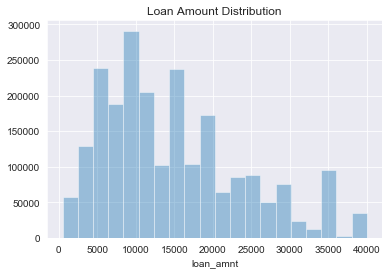

In [19]:
sns.set_style('darkgrid')
sns.distplot(loan['loan_amnt'], bins=20, kde=False)
plt.title('Loan Amount Distribution')
plt.show()

**Funded Amount**

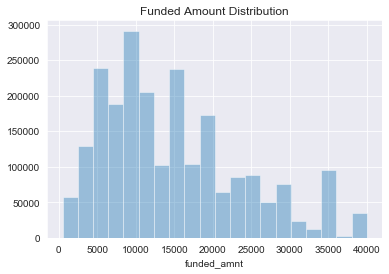

In [20]:
sns.distplot(loan['funded_amnt'], bins=20, kde=False)
plt.title('Funded Amount Distribution')
plt.show()

In [21]:
len(loan) - (loan['funded_amnt'] == loan['loan_amnt']).sum()

2065

Loan Amount dan Funded Amount memiliki distribusi yang mirip. Hal ini menunjukan bahwa investor banyak memberikan pinjaman sesuai dengan yang diminta oleh peminjam dana.

Hanya terdapat 2065 data yang jumlah pinjamannya tidak sama dengan yang diminta oleh peminjam.

**Term**

In [22]:
loan['term'].value_counts(normalize=True)

 36 months    0.71207
 60 months    0.28793
Name: term, dtype: float64

In [23]:
loan['term'] = loan['term'].astype('category')

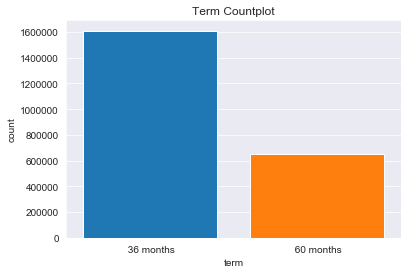

In [24]:
sns.countplot(loan['term'], saturation=1, edgecolor='white')
plt.title('Term Countplot')
plt.show()

71% dari data pinjaman merupakan pinjaman dengan jangka waktu 36 bulan

**Interest rate**

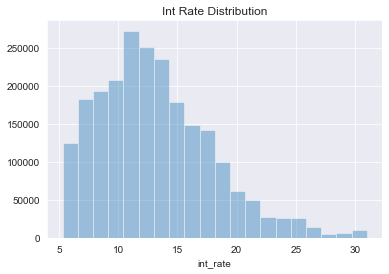

In [25]:
sns.distplot(loan['int_rate'], bins=20, kde=False)
plt.title('Int Rate Distribution')
plt.show()

**Grade**

In [26]:
loan['grade'].value_counts(normalize=True)

B    0.293523
C    0.287549
A    0.191548
D    0.143508
E    0.060000
F    0.018490
G    0.005382
Name: grade, dtype: float64

In [27]:
loan['grade'] = loan['grade'].astype('category')

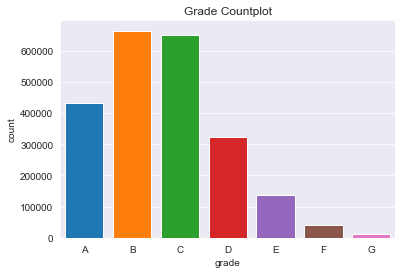

In [28]:
sns.countplot(loan['grade'], saturation=1, edgecolor='white')
plt.title('Grade Countplot')
plt.show()

Grade B dan C merupakan kategori grade yang paling umum dari data ini. Grade G hanya 0.5% dari total data.

**Employee Length**

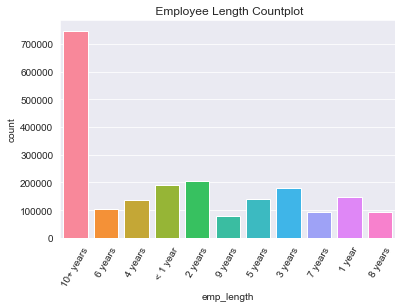

In [29]:
sns.countplot(loan['emp_length'], saturation=1, edgecolor='white')
plt.title(' Employee Length Countplot')
plt.xticks(rotation=60)
plt.show()

In [30]:
loan['emp_length'] = loan['emp_length'].astype('category')

**Employee Title**

In [31]:
loan['emp_title'].nunique()

512694

In [32]:
loan.drop('emp_title', axis=1, inplace=True)

Employee Title memiliki terlalu banyak nilai unik sehingga akan sulit untuk di plot ke dalam grafik. Kita juga drop kolom ini, kita tidak akan menggunakannya dalam analisis lebih lanjut

**Home Ownership**

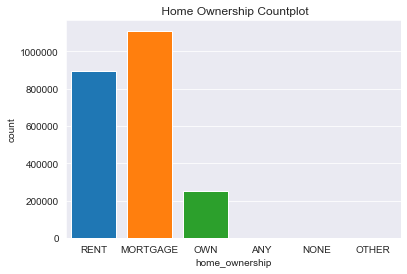

In [33]:
sns.countplot(loan['home_ownership'], saturation=1, edgecolor='white')
plt.title(' Home Ownership Countplot')
plt.show()

In [34]:
loan['home_ownership'] = loan['home_ownership'].astype('category')

Terdapat 6 kategori dari home ownership yaitu: RENT, MORTGAGE, OWN, ANY, NONE, dan OTHER. Tiga kategori yang sangat sedikit jumlahnya adalah ANY, NONE, dan OTHER.

**Annual Income**

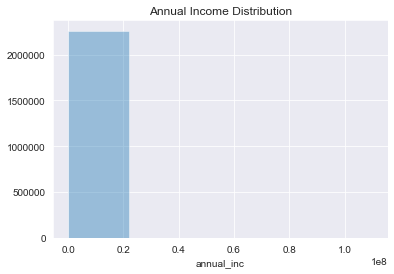

In [35]:
sns.distplot(loan['annual_inc'], bins=5, kde=False)
plt.title('Annual Income Distribution')
plt.show()

Plot distribusi dari kolom Annual Income terlihat seperti gambar di atas. Hal ini menunjukan bahwa terdapat outlier dalam kolom ini.

**Verification Status**

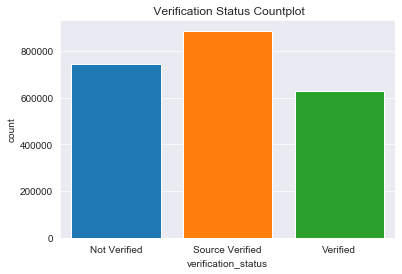

In [36]:
sns.countplot(loan['verification_status'], saturation=1, edgecolor='white')
plt.title(' Verification Status Countplot')
plt.show()

In [37]:
loan['verification_status'] = loan['verification_status'].astype('category')

Dalam kolom verification status terdapat 3 nilai unik yaitu: Not Verified, Source Verified, dan Verified

**Issue date**

In [38]:
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%Y')

In [39]:
loan_per_year = loan.resample('Y', on='issue_d').count()['loan_amnt']

In [40]:
loan_per_year.index[0].strftime('%Y')

'2007'

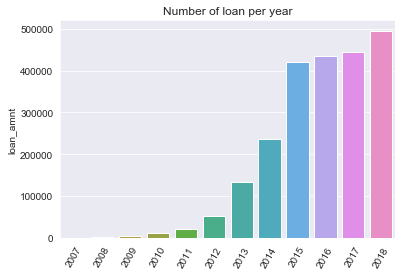

In [41]:
sns.barplot(x = loan_per_year.index.strftime('%Y'), y=loan_per_year)
plt.xticks(rotation=60)
plt.title('Number of loan per year')
plt.show()

In [42]:
loan_per_month = loan.resample('M', on='issue_d').count()['loan_amnt']

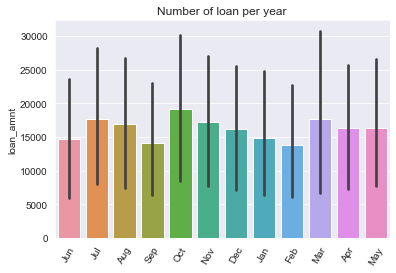

In [43]:
sns.barplot(x = loan_per_month.index.strftime('%b'), y=loan_per_month)
plt.xticks(rotation=60)
plt.title('Number of loan per year')
plt.show()

Ketika jumlah pinjaman tiap tahun kita plot dalam sebuah grafik, kita dapat melihat bahwa jumlah pinjaman yang tercatat semakin tahun semakin meningkat. Terjadi peningkatan yang cukup signifikan dari tahun 2012 - 2015.

**Loan Status**

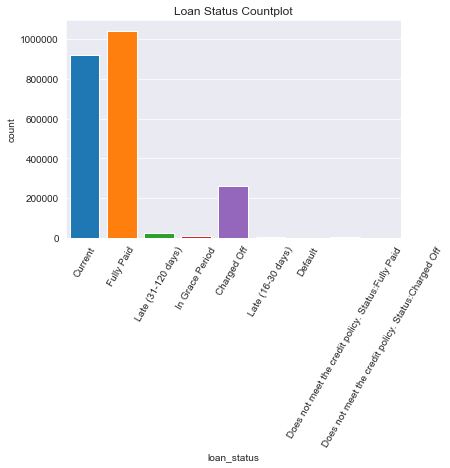

In [44]:
sns.countplot(loan['loan_status'], saturation=1, edgecolor='white')
plt.title('Loan Status Countplot')
plt.xticks(rotation=60)
plt.show()

In [45]:
loan['loan_status'] = loan['loan_status'].astype('category')

Terdapat 9 kategori status pinjaman. Tiga kategori yang paling banyak adalah Current, Fully Paid, dan Charged Off. Kolom ini merupakan kolom yang akan dijadikan sebagai target dari analisis. Tujuan dari analisis ini adalah apakah kolom-kolom yang telah terpilih memiliki efek terhadap status pinjaman (loan status)

**Purpose**

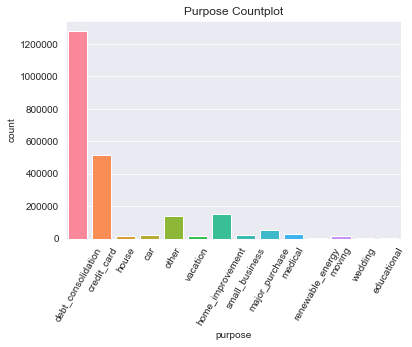

In [46]:
sns.countplot(loan['purpose'], saturation=1, edgecolor='white')
plt.title('Purpose Countplot')
plt.xticks(rotation=60)
plt.show()

In [47]:
loan['purpose'] = loan['purpose'].astype('category')

Pinjaman yang dilakukan banyak untuk melakukan konsolidasi hutang dan pembayaran kartu kredit

**Debt to Income**

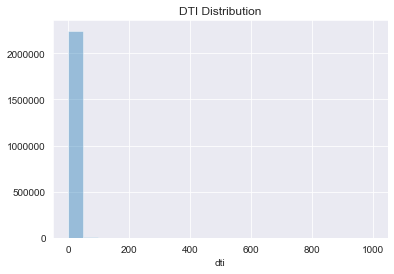

In [48]:
sns.distplot(loan['dti'], bins=20, kde=False)
plt.title('DTI Distribution')
plt.show()

In [49]:
len(loan[loan['dti'] <= 100])

2256396

In [50]:
len(loan[loan['dti'] > 100])

2561

Distribusi dari Debt to Income mirip seperti kolom annual income, terdapat outlier dalam data ini.

**Target = Loan Status**

In [51]:
loan['loan_status'].value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [52]:
# Hanya mengambil loan status = Fully Paid, Charged Off, dan Default
loan_filter = loan[(loan['loan_status'] == 'Fully Paid') | (loan['loan_status'] == 'Charged Off') | 
                   (loan['loan_status'] == 'Default')]

In [53]:
def change_default_to_charged_off(ser):
    if ser == 'Default':
        return 'Charged Off'
    else:
        return ser

In [54]:
# Mengubah loan_status default menjadi charged off
loan_filter['loan_status']= loan_filter['loan_status'].apply(change_default_to_charged_off)

In [55]:
loan_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303638 entries, 100 to 2260664
Data columns (total 13 columns):
loan_amnt              1303638 non-null int64
funded_amnt            1303638 non-null int64
term                   1303638 non-null category
int_rate               1303638 non-null float64
grade                  1303638 non-null category
emp_length             1228181 non-null category
home_ownership         1303638 non-null category
annual_inc             1303638 non-null float64
verification_status    1303638 non-null category
issue_d                1303638 non-null datetime64[ns]
loan_status            1303638 non-null object
purpose                1303638 non-null category
dti                    1303326 non-null float64
dtypes: category(6), datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 87.0+ MB


In [56]:
loan_filter['loan_status'] = loan_filter['loan_status'].astype('category')

In [57]:
loan_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303638 entries, 100 to 2260664
Data columns (total 13 columns):
loan_amnt              1303638 non-null int64
funded_amnt            1303638 non-null int64
term                   1303638 non-null category
int_rate               1303638 non-null float64
grade                  1303638 non-null category
emp_length             1228181 non-null category
home_ownership         1303638 non-null category
annual_inc             1303638 non-null float64
verification_status    1303638 non-null category
issue_d                1303638 non-null datetime64[ns]
loan_status            1303638 non-null category
purpose                1303638 non-null category
dti                    1303326 non-null float64
dtypes: category(7), datetime64[ns](1), float64(3), int64(2)
memory usage: 78.3 MB


In [58]:
# Menghapus sisa data yang memiliki missing value
loan_clean = loan_filter.dropna()
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1228167 entries, 100 to 2260664
Data columns (total 13 columns):
loan_amnt              1228167 non-null int64
funded_amnt            1228167 non-null int64
term                   1228167 non-null category
int_rate               1228167 non-null float64
grade                  1228167 non-null category
emp_length             1228167 non-null category
home_ownership         1228167 non-null category
annual_inc             1228167 non-null float64
verification_status    1228167 non-null category
issue_d                1228167 non-null datetime64[ns]
loan_status            1228167 non-null category
purpose                1228167 non-null category
dti                    1228167 non-null float64
dtypes: category(7), datetime64[ns](1), float64(3), int64(2)
memory usage: 73.8 MB


Terdapat 1,2 juta data yang dapat kita gunakan sebagai analisis lebih lanjut.

In [59]:
# eskport data yang siap untuk analisis lebih lanjut
loan_clean.to_csv('loan_clean.csv', index=False)